<a href="https://colab.research.google.com/github/matiasenriqueva/Proyecto-Final-Machine-Learning/blob/main/MLPF_S5_Interpreter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Reconocimiento de Actividad Humana (HAR)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.manifold import TSNE

###Entrega 01 - OBTAIN

Incluir todo el código de la Etapa 01 - OBTAIN creada en la semana anterior

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
file = pd.read_table('/content/drive/MyDrive/CourseML/Datasets/WISDM/WISDM_ar_v1.1_raw.txt',header=None, on_bad_lines='skip')

df = pd.DataFrame(file)
df.head()

,0
0,"33,Jogging,49105962326000,-0.6946377,12.680544..."
1,"33,Jogging,49106062271000,5.012288,11.264028,0..."
2,"33,Jogging,49106112167000,4.903325,10.882658,-..."
3,"33,Jogging,49106222305000,-0.61291564,18.49643..."
4,"33,Jogging,49106332290000,-1.1849703,12.108489..."


###Entrega 02 - SCRUB

Eliminar filas con datos faltantes

*Uno de los pasos iniciales en la limpieza de datos consiste en eliminar aquellas filas que contengan datos faltantes. Estas líneas generalmente no aportan información y pueden complicar la etapa de entrenamiento y validación de muchos modelos predictivos.*


In [ ]:
data_list= []

for i in range(len(df)):
    try:
        row = df.iloc[i,0]
        row = row.split(',')
        semicolon_row = row[5].split(';')[0]
        semicolon_row = semicolon_row.strip()
        if semicolon_row == '':
            break;
        df_row = [row[0], row[1], row[2], row[3], row[4], semicolon_row]
        data_list.append(df_row)
    except:
        print('Error at line number: ', i)

#Probablemente esto no arroje ningun error, pues a la hora de cargar el archivo con pandas se saltaron
#las lineas erroneas, además no se esta leyendo el archivo directamente.

df = pd.DataFrame(data_list)

Agregar al DataFrame los nombres de las columnas 

*En ocasiones al crear los data frames el sistema asigna nombres genéricos y correlativos a las columnas. Es recomendable renombrar las columnas por nombres significativos para favorecer el análisis posterior de los datos.*

In [ ]:
df.columns = ['user', 'activity', 'time', 'x', 'y', 'z']

Visualizar las 5 primeras filas del DataFrame (.head())

*Siempre es buena medida visualizar algunas líneas del dataframe para tener una idea concreta del contenido.*


In [ ]:
df.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


Buscar datos nulos y eliminarlos si es que existen

In [ ]:
df = df.dropna()
df.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

Visualizar los tipo de datos a los que pertenece cada columna (.info())

*Es necesario tener un detalle de cuantas variables están considerando y el tipo de datos que pertenecen para verificar si es posible utilizarla directamente para el modelo predictivo o si es necesario realizar una transformación del tipo de dato.*


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 18.3+ MB


Cambiar el tipo de datos de las variables predictoras a valores reales, para realizar la clasificación 

*Muchas de las variables contenidas en el DataFrame originalmente se encuentran en el tipo de dato 'object'. En ese formato las variables no pueden ser interpretadas como vectores. Recordemos que la mayoría de los modelos de Machine Learning estudiados operan en el espacio vectorial. Por esta razón las variables que formarán parte del modelo predictivo deben ser transformadas a un formato numérico como 'Float' o 'integer'.*

Para este proyecto en particular se pide transformar  al tipo de dato Float, las variables del acelerómetro en el eje $x$, $y$ y $z$



In [ ]:
df['x'] = df['x'].astype('float')
df['y'] = df['y'].astype('float')
df['z'] = df['z'].astype('float')

Imprimir los tipos de datos de las variables del DataFrame

*Se recomienda volver a ejecutar el comando info para verificar que efectivamente las variables cambiaron su tipo de dato y que ahora se pueden procesar con los modelos predictivos.*


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 18.3+ MB


Eliminar las columnas que no se utilizaran para la clasificación

*En este caso deberíamos conservar la actividad respectiva y las variables asociadas al acelerómetro*


In [ ]:
df = df.drop(['user', 'time'], axis = 1)
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


Utilizar el comando *value_counts* para obtener un detalle de cuantas instancias se tienen por actividad. El objetivo consiste en identificar la presencia del balance o desbalance en las categorías a modelar


In [ ]:
df["activity"].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

Este proyecto considera datos con un desbalance de clases. Es necesario balancearlos para que los modelos operen de manera adecuada. Existen muchas maneras de realizar un balance, pero en este proyecto utilizaremos una estrategia sencilla e intuitiva. Simplemente debe identificar la actividad que contenga el número menor de instancias. Se debe realizar un muestreo para las otras actividades utilizando ese valor. De esta manera todas las clases tendrán la misma cantidad de instancias. 



In [ ]:
standing = df[df['activity']=='Standing'] #Standing es la actividad con menos instancias
size = len(standing)

walking = df[df['activity']=='Walking'].head(size)
jogging = df[df['activity']=='Jogging'].head(size)
upstairs = df[df['activity']=='Upstairs'].head(size)
downstairs = df[df['activity']=='Downstairs'].head(size)
sitting = df[df['activity']=='Sitting'].head(size)

df_ds = pd.concat([walking, jogging, upstairs, downstairs, sitting, standing])


Establecer el número de instancias y dimensiones del data frame resultante *(shape)*


In [ ]:
df_ds.shape

(21330, 4)

Volver a imprimir la cantidad de instancias por categoría para verificar que todo esté en orden. *(value_counts)*

In [ ]:
df_ds["activity"].value_counts()

Walking       3555
Jogging       3555
Upstairs      3555
Downstairs    3555
Sitting       3555
Standing      3555
Name: activity, dtype: int64

Volver a visualizar las cinco primeras líneas del DataFrame para revisar que todo esté en orden *(head)*


In [ ]:
df_ds.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


Separar las variables predictoras (X) de las ctegorias o etiquetas (y)

In [ ]:
X = df_ds[["x", "y", "z"]]
y = df_ds[["activity"]]
X.head()

,x,y,z
597,0.844462,8.008764,2.792171
598,1.116869,8.621680,3.786457
599,-0.503953,16.657684,1.307553
600,4.794363,10.760075,-1.184970
601,-0.040861,9.234595,-0.694638


Estandarizar los datos numericos (*StandardScaler)*

*Para el caso de la estandarización de los datos se pueden usar distintas técnicas, como la normalización 01, estandarización entre -1 y 1 o el denominado Z-Score. En este caso usaremos la función Standard Scaler de Python con sus valores por defecto.*


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = ['x','y','z'])
X.head()

,x,y,z
0,0.000503,-0.099190,0.337933
1,0.073590,0.020386,0.633446
2,-0.361275,1.588160,-0.103312
3,1.060258,0.437573,-0.844119
4,-0.237028,0.139962,-0.698386


In [ ]:
X.index = y.index

Como último paso debe reconstruir el dataframe pegando las columnas de los variables predicadores (X) y las categorías (y)


In [ ]:
df_clean = pd.concat([y,X], axis = 1)
df_clean.head()

,activity,x,y,z
597,Walking,0.000503,-0.099190,0.337933
598,Walking,0.073590,0.020386,0.633446
599,Walking,-0.361275,1.588160,-0.103312
600,Walking,1.060258,0.437573,-0.844119
601,Walking,-0.237028,0.139962,-0.698386


In [ ]:
df_clean.isna().sum()

activity    0
x           0
y           0
z           0
dtype: int64

# Entrega 03 - EXPLORE

Comprobación de los datos una vez estos han sido equilibrados y escalados

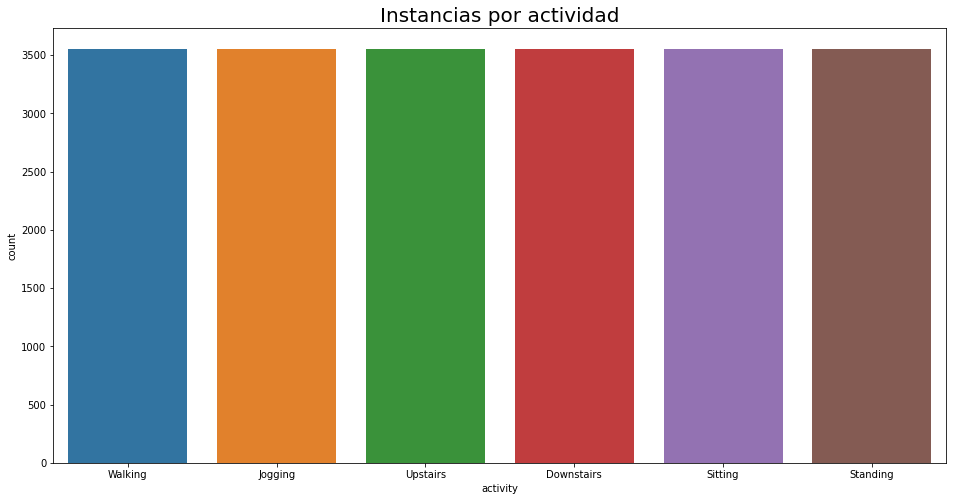

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Instancias por actividad', fontsize=20)
sns.countplot(x='activity', data = df_clean)
plt.show()

Volvemos a comprobar la cantidad de elementos, de esta manera nos aserguramos que no existe un desbalanceo de clases como tal, de esta manera intentamos evitar que alguna clase se vea perjudicada debido a no tener suficientes instancias de representatividad.


In [ ]:
df_clean.activity.value_counts()

Walking       3555
Jogging       3555
Upstairs      3555
Downstairs    3555
Sitting       3555
Standing      3555
Name: activity, dtype: int64

Realizamos una observación general de como es que se distribuyen todos los atributos dentro del dataset escalado



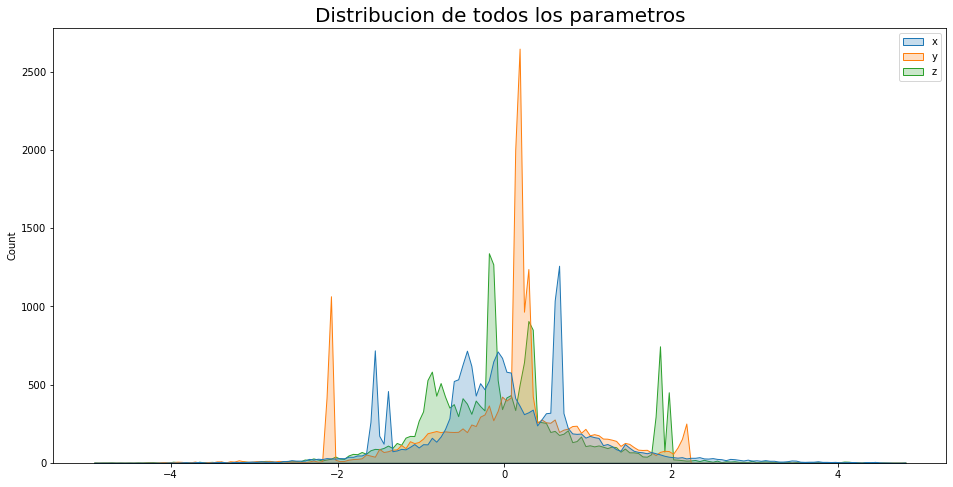

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Distribucion de todos los parametros', fontsize=20)
sns.histplot(data=df_clean, element='poly')
plt.show()

<Figure size 1728x864 with 0 Axes>

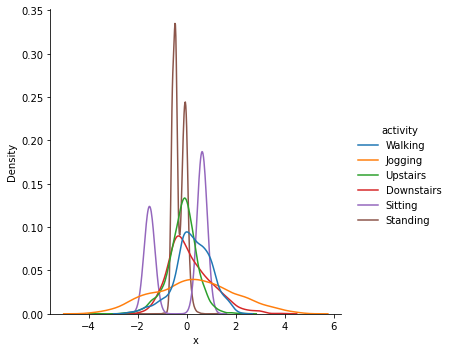

<Figure size 1728x864 with 0 Axes>

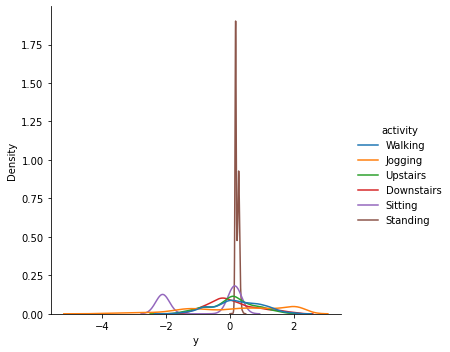

<Figure size 1728x864 with 0 Axes>

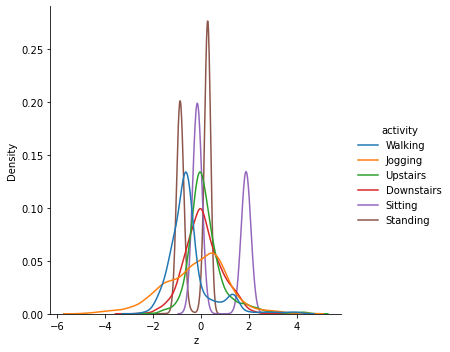

In [ ]:
plt.figure(figsize=(24,12))
sns.displot(data=df_clean, x="x", kind="kde", hue='activity', warn_singular=False)
plt.show()

plt.figure(figsize=(24,12))
sns.displot(data=df_clean, x="y", kind="kde", hue='activity', warn_singular=False)
plt.show()

plt.figure(figsize=(24,12))
sns.displot(data=df_clean, x="z", kind="kde", hue='activity', warn_singular=False)
plt.show()

En los gráficos anteriores se aprecia como se comporta la densidad de cada actividad enfocandosé en cada una de las variables, donde se puede apreciar que cada actividad tiene una curva bastante caracteristicas, con peaks en variados para cada una de las actividades, itentando una forma de campana, cosa esperable al estar los datos preprocesados por Standar Scaler.

Una de las cosas a aplicar es T-sne, para poder observar las diferentes distribuciones de las actividades en una representación de dos ejes. Donde a lo largo de las diferentes iteraciones se lográ observar como es que se forman clusters mayormente definidos y más separados entre las diferentes actividades, logrando apreciar que cada una de estas se caracteriza por tender a ciertos datos.

In [ ]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # realizar t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity, n_jobs=-1).fit_transform(X_data)
        print('Done..')
        
        # preparar los datos para seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # dibujar la trama en el lugar apropiado en la cuadrícula
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 21330 samples in 0.017s...
[t-SNE] Computed neighbors for 21330 samples in 0.103s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21330
[t-SNE] Computed conditional probabilities for sample 2000 / 21330
[t-SNE] Computed conditional probabilities for sample 3000 / 21330
[t-SNE] Computed conditional probabilities for sample 4000 / 21330
[t-SNE] Computed conditional probabilities for sample 5000 / 21330
[t-SNE] Computed conditional probabilities for sample 6000 / 21330
[t-SNE] Computed conditional probabilities for sample 7000 / 21330
[t-SNE] Computed conditional probabilities for sample 8000 / 21330
[t-SNE] Computed conditional probabilities for sample 9000 / 21330
[t-SNE] Computed conditional probabilities for sample 10000 / 21330
[t-SNE] Computed conditional probabilities for sample 11000 / 21330
[t-SNE] Computed conditional probabilities for sampl

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 15000 / 21330
[t-SNE] Computed conditional probabilities for sample 16000 / 21330
[t-SNE] Computed conditional probabilities for sample 17000 / 21330
[t-SNE] Computed conditional probabilities for sample 18000 / 21330
[t-SNE] Computed conditional probabilities for sample 19000 / 21330
[t-SNE] Computed conditional probabilities for sample 20000 / 21330
[t-SNE] Computed conditional probabilities for sample 21000 / 21330
[t-SNE] Computed conditional probabilities for sample 21330 / 21330
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.228s
[t-SNE] Iteration 50: error = 136.0812836, gradient norm = 0.0136574 (50 iterations in 14.267s)
[t-SNE] Iteration 100: error = 117.1833344, gradient norm = 0.0062646 (50 iterations in 10.813s)
[t-SNE] Iteration 150: error = 109.9498596, gradient norm = 0.0044119 (50 iterations in 9.731s)
[t-SNE] Iteration 200: error = 105.7319794, gradient norm = 0.0036507 (50 iterations 

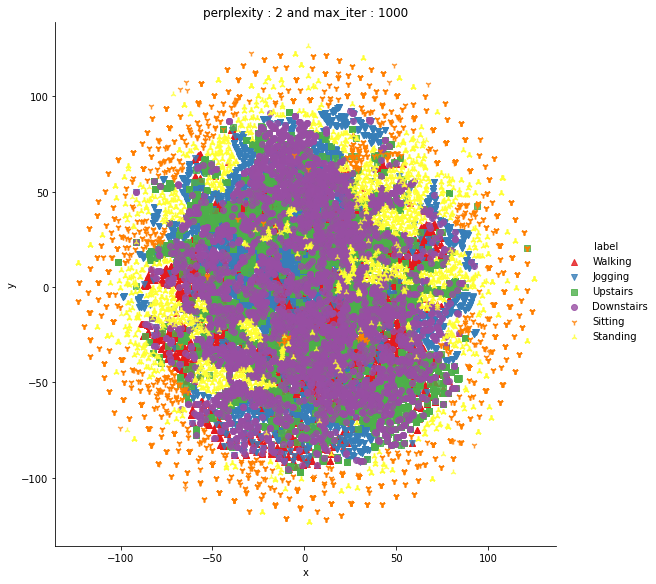

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 21330 samples in 0.021s...
[t-SNE] Computed neighbors for 21330 samples in 0.161s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 21330
[t-SNE] Computed conditional probabilities for sample 2000 / 21330
[t-SNE] Computed conditional probabilities for sample 3000 / 21330
[t-SNE] Computed conditional probabilities for sample 4000 / 21330
[t-SNE] Computed conditional probabilities for sample 5000 / 21330
[t-SNE] Computed conditional probabilities for sample 6000 / 21330
[t-SNE] Computed conditional probabilities for sample 7000 / 21330
[t-SNE] Computed conditional probabilities for sample 8000 / 21330
[t-SNE] Computed conditional probabilities for sample 9000 / 21330
[t-SNE] Computed conditional probabilities for sample 10000 / 21330
[t-SNE] Computed conditional probabilities for sample 11000 / 21330
[t-SNE] Computed conditional probabilities for sample 12000 / 21330
[t-SNE] Computed conditional probabilities for sample 13000 / 21330
[t-SNE] Computed conditional probabilities for sample 14000 / 21330
[t-SNE] Computed conditional probabilities for sample 150

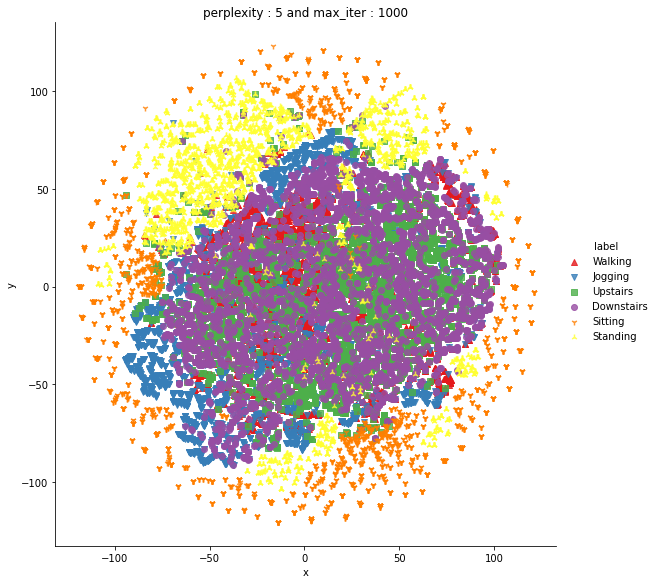

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 21330 samples in 0.022s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 21330 samples in 0.276s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21330
[t-SNE] Computed conditional probabilities for sample 2000 / 21330
[t-SNE] Computed conditional probabilities for sample 3000 / 21330
[t-SNE] Computed conditional probabilities for sample 4000 / 21330
[t-SNE] Computed conditional probabilities for sample 5000 / 21330
[t-SNE] Computed conditional probabilities for sample 6000 / 21330
[t-SNE] Computed conditional probabilities for sample 7000 / 21330
[t-SNE] Computed conditional probabilities for sample 8000 / 21330
[t-SNE] Computed conditional probabilities for sample 9000 / 21330
[t-SNE] Computed conditional probabilities for sample 10000 / 21330
[t-SNE] Computed conditional probabilities for sample 11000 / 21330
[t-SNE] Computed conditional probabilities for sample 12000 / 21330
[t-SNE] Computed conditional probabilities for sample 13000 / 21330
[t-SNE] Computed conditional probabilities for sample 14000 / 21330

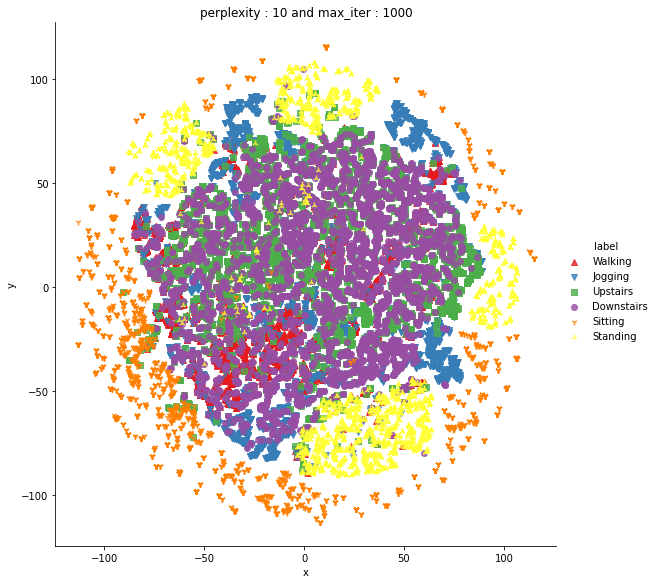

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 21330 samples in 0.020s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 21330 samples in 0.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21330
[t-SNE] Computed conditional probabilities for sample 2000 / 21330
[t-SNE] Computed conditional probabilities for sample 3000 / 21330
[t-SNE] Computed conditional probabilities for sample 4000 / 21330
[t-SNE] Computed conditional probabilities for sample 5000 / 21330
[t-SNE] Computed conditional probabilities for sample 6000 / 21330
[t-SNE] Computed conditional probabilities for sample 7000 / 21330
[t-SNE] Computed conditional probabilities for sample 8000 / 21330
[t-SNE] Computed conditional probabilities for sample 9000 / 21330
[t-SNE] Computed conditional probabilities for sample 10000 / 21330
[t-SNE] Computed conditional probabilities for sample 11000 / 21330
[t-SNE] Computed conditional probabilities for sample 12000 / 21330
[t-SNE] Computed conditional probabilities for sample 13000 / 21330
[t-SNE] Computed conditional probabilities for sample 14000 / 21330

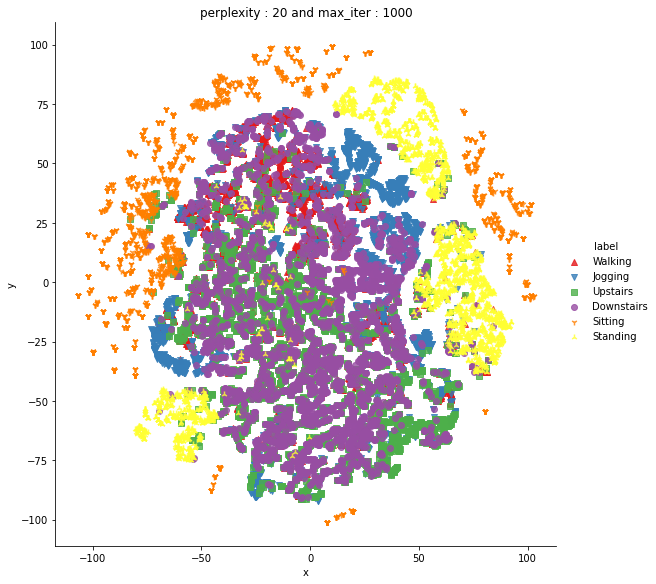

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 21330 samples in 0.018s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 21330 samples in 0.819s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21330
[t-SNE] Computed conditional probabilities for sample 2000 / 21330
[t-SNE] Computed conditional probabilities for sample 3000 / 21330
[t-SNE] Computed conditional probabilities for sample 4000 / 21330
[t-SNE] Computed conditional probabilities for sample 5000 / 21330
[t-SNE] Computed conditional probabilities for sample 6000 / 21330
[t-SNE] Computed conditional probabilities for sample 7000 / 21330
[t-SNE] Computed conditional probabilities for sample 8000 / 21330
[t-SNE] Computed conditional probabilities for sample 9000 / 21330
[t-SNE] Computed conditional probabilities for sample 10000 / 21330
[t-SNE] Computed conditional probabilities for sample 11000 / 21330
[t-SNE] Computed conditional probabilities for sample 12000 / 21330
[t-SNE] Computed conditional probabilities for sample 13000 / 21330
[t-SNE] Computed conditional probabilities for sample 14000 / 21330

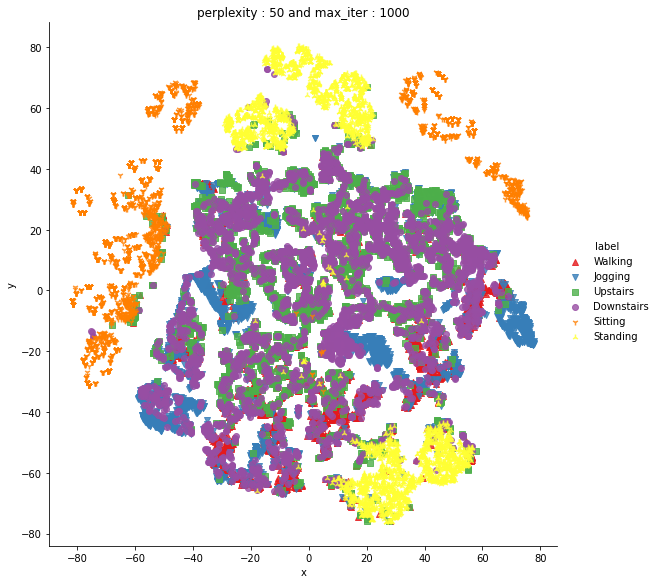

Done


In [ ]:
X_pre_tsne = df_clean.drop(['activity'], axis=1)
y_pre_tsne = df_clean['activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

# Entrega 04 - MODEL

Se entrenarán 3 modelos diferentes, SVM, Random Forest y XG Boost. Junto a sus métricas correspondientes.

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

Como se utilizarán datos de entrenamiento y prueba para SVM y Random Forest, se crean los diferentes valores para probar en dichos modelos.

In [ ]:
x_values = df_clean.drop(['activity'], axis=1)
y_values = df_clean['activity']

Se realiza la separación 70% de entrenamiento y 30% de pruebas

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.30)

In [ ]:
print("Tamaño de los datos de train: ", len(x_train))
print("Tamaño de los datos de test: ", len(x_test))

Tamaño de los datos de train:  14931
Tamaño de los datos de test:  6399


Se muestra el "Shape" de cada df separado

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (14931, 3)
y_train shape: (14931,)
x_test shape: (6399, 3)
y_test shape: (6399,)


# SVM

Se crea y entrena el modelo SVM

In [ ]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

Se obtiene la predicción

In [ ]:
pred_svm = svm_model.predict(x_test)

Se muestra los resultados, primero el reporte de clasificación, que nos muestra 4 tipos de medidas.

In [ ]:
clr = classification_report(y_test, pred_svm)
print('================REPORTE DE CLASIFICACIÓN================\n\n', clr)

================REPORTE DE CLASIFICACIÓN================

               precision    recall  f1-score   support

  Downstairs       0.51      0.50      0.50      1052
     Jogging       0.86      0.65      0.74      1054
     Sitting       0.95      1.00      0.97      1014
    Standing       0.81      0.99      0.89      1091
    Upstairs       0.58      0.52      0.55      1135
     Walking       0.61      0.68      0.65      1053

    accuracy                           0.72      6399
   macro avg       0.72      0.72      0.72      6399
weighted avg       0.72      0.72      0.71      6399



Se muestra la matriz de confusión

(Text(33.0, 0.5, 'True Class'), Text(0.5, 15.0, 'Predicted Class'))

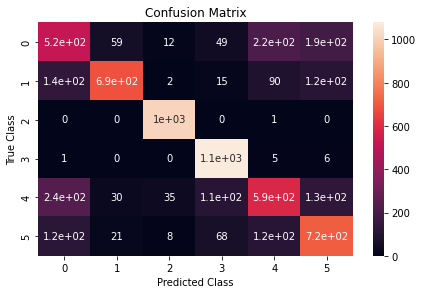

In [ ]:
cm = confusion_matrix(y_test, pred_svm)

sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")

Puntaje de la presición del modelo

In [ ]:
acc_svm = metrics.accuracy_score(pred_svm, y_test)
print('Precisión SVM:', acc_svm)

Precisión SVM: 0.7197999687451164


# Random Forest

Se crea y entrena el modelo Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, criterion='entropy')
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

Se obtiene la predicción

In [ ]:
pred_rf = rf_model.predict(x_test)

Se muestra el reporte de clasificación

In [ ]:
clr = classification_report(y_test, pred_rf)
print('================REPORTE DE CLASIFICACIÓN================\n\n', clr)

================REPORTE DE CLASIFICACIÓN================

               precision    recall  f1-score   support

  Downstairs       0.54      0.53      0.53      1052
     Jogging       0.77      0.67      0.72      1054
     Sitting       1.00      1.00      1.00      1014
    Standing       0.96      0.97      0.96      1091
    Upstairs       0.60      0.59      0.60      1135
     Walking       0.63      0.71      0.67      1053

    accuracy                           0.74      6399
   macro avg       0.75      0.75      0.75      6399
weighted avg       0.75      0.74      0.74      6399



Se muestra la matriz de confusión

(Text(33.0, 0.5, 'True Class'), Text(0.5, 15.0, 'Predicted Class'))

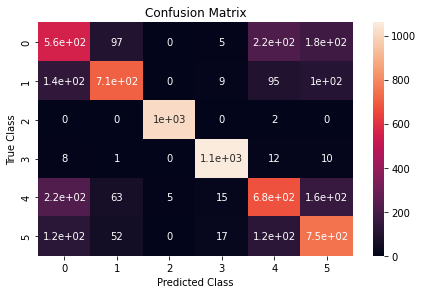

In [ ]:
cm = confusion_matrix(y_test, pred_rf)

sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")

Puntaje de la predicción del modelo

In [ ]:
acc_rf = metrics.accuracy_score(pred_rf, y_test)
print('Precisión Random Forest:', acc_rf)

Precisión Random Forest: 0.7438662290982966


# XG Boost

El caso de XG Boost es un poco diferente pues en este caso se trabaja con arreglos y números para las etiquetas, por lo que transformamos las actividades con LabelEncoder, para que sean números. Luego se transforma cada elementos del data frame a arreglo de NumPy para tener los valores de x e y para el modelo.

In [ ]:
lb = LabelEncoder()
df_clean['activity'] = lb.fit_transform(df_clean['activity'])
xgb_y = df_clean['activity'].to_numpy()
xgb_x = df_clean[['x','y','z']].to_numpy()
print(xgb_y)
print(xgb_x)

[5 5 5 ... 3 3 3]
[[ 5.03429609e-04 -9.91902539e-02  3.37933293e-01]
 [ 7.35899668e-02  2.03858447e-02  6.33446342e-01]
 [-3.61274948e-01  1.58816023e+00 -1.03312182e-01]
 ...
 [-6.28513500e-01  1.97593426e-01  2.61018941e-01]
 [-7.81443988e-01  4.93221540e-02  1.55767761e-01]
 [-8.00224925e-01  2.67827186e-01  4.75569499e-01]]


Separamos las muestras de entrenamiento y prueba en proporcion 70% y 30% como los modelos anteriores.

In [ ]:
x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(xgb_x, xgb_y, test_size=0.3)

Se convierten a matrices de trabajo para el modelo

In [ ]:
d_boosttrain = xgb.DMatrix(x_train_xgb, label=y_train_xgb)
d_boosttest = xgb.DMatrix(x_test_xgb, label=y_test_xgb)


Se establecen valores de parametros y el número de rondas que ejecutará cada iteración del modelo.

In [ ]:
parameters = {'eta': 0.3, 'objective': 'multi:softprob', 'num_class': 6, 'max_depth': 3}
num_round = 20

Se crea y entrena el modelo

In [ ]:
bst = xgb.train(parameters, d_boosttrain, num_round)

Se obtiene todas las combinaciones de predicciones que se obtuvieron del modelo

In [ ]:
xgb_pred = bst.predict(d_boosttest)

Se analizan las predicciones para obtener el arreglo que tenga una predicción más alta, de esta manera obtenemos el mejor resultado de predicción del modelo.

In [ ]:
best_pred = np.asarray([np.argmax(line) for line in xgb_pred])

Se muestra el reporte de clasificación

In [ ]:
clr = classification_report(y_test_xgb, best_pred)
print('================REPORTE DE CLASIFICACIÓN================\n\n', clr)

================REPORTE DE CLASIFICACIÓN================

               precision    recall  f1-score   support

           0       0.49      0.39      0.44      1069
           1       0.83      0.63      0.71      1040
           2       0.98      0.99      0.98      1085
           3       0.85      0.98      0.91      1075
           4       0.49      0.53      0.51      1093
           5       0.58      0.68      0.62      1037

    accuracy                           0.70      6399
   macro avg       0.70      0.70      0.70      6399
weighted avg       0.70      0.70      0.70      6399



Se muestra la matriz de confusión

(Text(33.0, 0.5, 'True Class'), Text(0.5, 15.0, 'Predicted Class'))

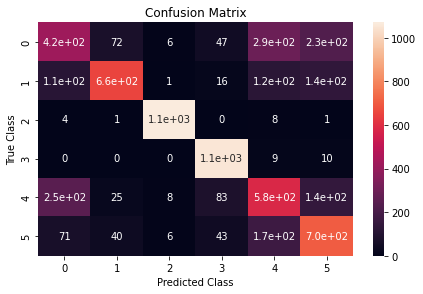

In [ ]:
cm = confusion_matrix(y_test_xgb, best_pred)

sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")

Puntaje de la predicción del modelo.

In [ ]:
acc_xgb = metrics.accuracy_score(best_pred, y_test_xgb)
print('Precisión XG Boost:', acc_xgb)

Precisión XG Boost: 0.7015158618534146


# Etapa 5 - INTERPRETER

**Resultados esperados vs resultados obtenidos**

Uno de los elementos a considerar dentro de nuestras suposiciones era obtener metricas sobre el 95% de precisión de predicción. 

Una vez se entrenaron los modelos de SVM, Random Forest y XGBoost se obtuvo la precisión real de aproximadamente 72% para SVM, 74% para Random Forest y un 70% para XGBoost, lo cual hacer que no cumpla con las expectativas planteadas en una primera instancia. 

El porqué no se esta cumpliendo con lo esperado puede deberse a diferentes factores, dentro de los que más pueden destacar es el preprocesamiento de datos, es  probable que los datos no hayan sido tratados de la mejor manera a la hora de adaptar el data set para cada uno de los modelos predictivos, lo que podría estar ocasionando que las predicciones no sean tan certeras. El como subsanar esta diferencia de precisión puede relacionarse a la elección de los elementos de entrenamiento o al tamaño de los data frames con el cual se entrenan los modelos.

Otra posible razón por la cual se presenta este tipo de incongruencia entre el esperado y el obtenido puede deberse a que los modelos no son los más optimos para este tipo de data set, por lo que se podría probar con otros modelos para descartar esta posibilidad.

De todo modos, dentro de los modelos estudiados el modelo que obtuvo una mejor calificación es el modelo de Random Forest con un 74% de precisión en su predicción lo cual hace que sea capaz de predecir al menos 3 de 4 casos de manera correcta, lo cual permitiría predecir el comportamiento y/o actividades de un individuo en 3/4 de las acciones que realice el usuario.

**Conclusiones**

En caso de que se quisiera utilizar un algoritmo o modelo para predecir el comportamiento humano basado en las actividades realizadas a lo largo del día, se recomienda usar Random Forest debido a la prescencia de mayor efectividad de predicción. Sin embargo no se descarta la posibilidad de la utilización de alguno de los otro modelos, debido a que trabajan con una precisión similar.